<a href="https://colab.research.google.com/github/elizabethts/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns


## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

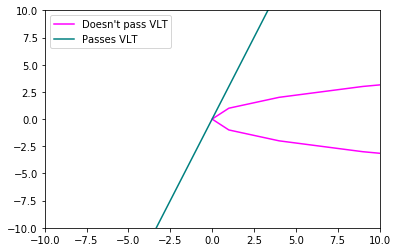

In [137]:
b = [i for i in range(-5,6)]
a = [i**2 for i in b]
c = [3*i for i in b]

f1 = plt.figure(1)
plt.plot(a,b, color = 'magenta')
plt.plot(b,c, color = 'teal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.legend(["Doesn't pass VLT", 'Passes VLT'])


plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

A function maps each input to only one output and in a line that doesn't pass the vertical line test there are two inputs mapped to the same output

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

---



\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

- Relation 3
- Relation 4
- Relation 5

The y-values are unique in these relations





# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

#m:
- The domain has 3D
- The range has 2D

#n:
 - The domain has 4D
 - The range has 2D
 

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

#NEED TO DO THIS


# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

##Transformation Matrix p
\begin{align}
 \begin{bmatrix} 1  &   3 \\-1  &  2 \\  \end{bmatrix} \end{align}
 \\
 
 
 ## Transformation Matrix q
 \begin{align}
 \begin{bmatrix} 4  &  1 & 2 \\-1  &  2  & 3\\ 5 & 1 &-2 \\  \end{bmatrix} \end{align}


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [138]:
#p
p_matrix = np.matrix([[1,3], [-1,2]])
input_1 = np.array([2,3])

print(np.matmul(p_matrix, input_1))


#q
q_matrix = np.matrix([[4,1,2], [-1,2,3], [5,1,-2]])
input_2 = np.array([1,2,3])
print(np.matmul(q_matrix, input_2))


[[11  4]]
[[12 12  1]]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

- Eigenvectors and eigenvalues come in pairs
- Eigenvectors do not change direction when a linear transformation scales them
- Eigenvalues represent the scalar by which the eigenvector will be transformed

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

- Too many features causes diminishing returns in predictive models
- hard to visualize
- increased computational workload
- Increased sparcity in measures of spread which is bad for clustering algorithms
- Risk of overfitting if number of observations is low in comparison to dimensions

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have 5x observations for each dimension

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [139]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


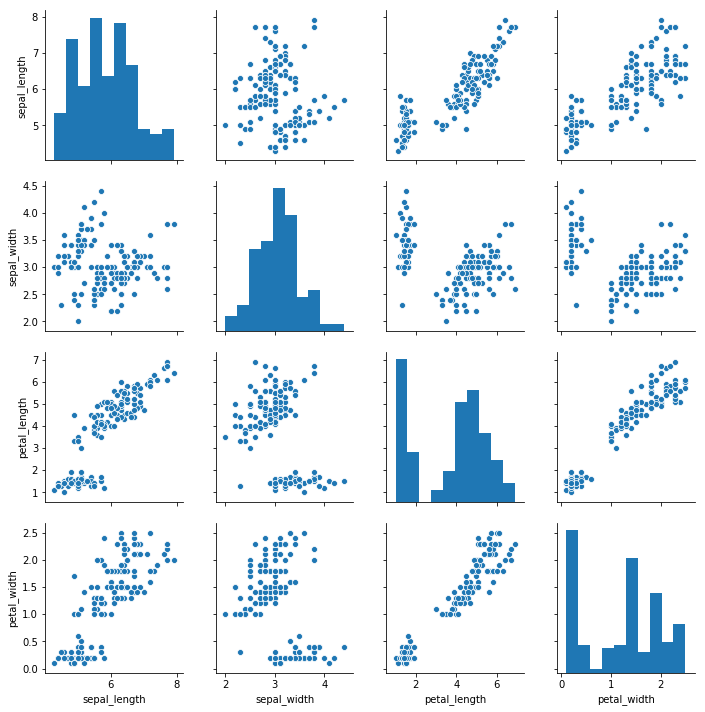

In [140]:
sns.pairplot(df)

In [141]:
cov = df.cov()
cov

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


In [142]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
#the eig function returns a tuple
#you get eigenvalues, eigenvectors
#an eigen basis is orthonormal
#orthonormal means A(inverse) == A(transpose)

print('The inverse is:', np.linalg.inv(eigenvectors),'\n')
print('The transpose is:', eigenvectors.T,'\n')

#how to confirm that they're equal
np.testing.assert_almost_equal(eigenvectors.T, np.linalg.inv(eigenvectors))

The inverse is: [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]] 

The transpose is: [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]] 



In [143]:
pca = PCA(n_components = 2)
df2 = df.drop('species', axis='columns')

print(pca.fit_transform(df2))
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
#B = pca.transform(df2)
#print("\n Projected Data: \n", B)


[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]
 [-2.50652679  0.65193501]
 [-2.61314272  0.02152063]
 [-2.78743398 -0.22774019]
 [-3.22520045 -0.50327991]
 [-2.64354322  1.1861949 ]
 [-2.38386932  1.34475434]
 [-2.6225262   0.81808967]
 [-2.64832273  0.31913667]
 [-2.19907796  0.87924409]
 [-2.58734619  0.52047364]
 [-2.3105317   0.39786782]
 [-2.54323491  0.44003175]
 [-3.21585769  0.14161557]
 [-2.30312854  0.10552268]
 [-2.35617109 -0.03120959]
 [-2.50791723 -0.13905634]
 [-2.469056    0.13788731]
 [-2.56239095  0.37468456]
 [-2.63982127  0.31929007]
 [-2.63284791 -0.19007583]
 [-2.58846205 -0.19739308]
 [-2.41007734  0.41808001]
 [-2.64763667  0.81998263]
 [-2.59715948  1.10002193]
 [-2.67384469 -0.1066917 ]
 [-2.86699985  0.0771931 ]
 [-2.62522846  0.60680001]
 

In [153]:
df_pca = pd.DataFrame(pca.fit_transform(df2), columns=['pca 1','pca 2'])
df_pca.head()

,pca 1,pca 2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [154]:
pca4 = PCA(n_components = 4)
df_pca4 = pd.DataFrame(pca4.fit_transform(df2), columns=['pca 1','pca 2', 'pca 3', 'pca 4'])
print(df_pca4.shape)
df_pca4.head()

(150, 4)


,pca 1,pca 2,pca 3,pca 4
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129


In [155]:
# pca1 explains 92% of the variance
# pca2 explains 5% of the variance

# pca1 is the direction of strongest variance

print(pca4.explained_variance_ratio_)
print(pca.explained_variance_ratio_)


[0.92461621 0.05301557 0.01718514 0.00518309]
[0.92461621 0.05301557]


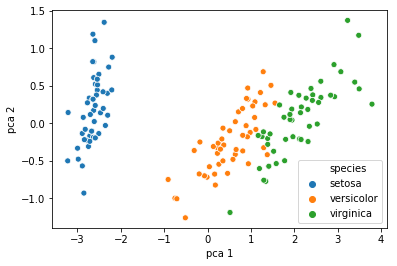

In [164]:
df_pca['species'] = df['species']

sns.scatterplot(x= df_pca['pca 1'], y= df_pca['pca 2'], data = df_pca, hue = 'species');

AttributeError: ignored

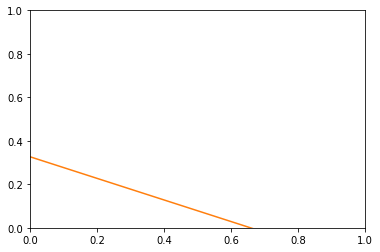

In [148]:
plt.plot(df_pca)

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)